# CSE 601 Data Mining and Bioinformatics
# Project 1: Dimensionality Reduction and Association Analysis

# Part 1: Dimensionality Reduction
Description: This program conducts dimensionality reduction on biomedical data files using PCA, SVD and t-SNE algorithms.
(Note that we have implemented PCA from scratch while SVD and t-SNE algorithms are implemented using libraries).

Submitted By:
    
Name: Karan Manchandia | 
UBIT: karanman | 
Person No.: 50290755
    
Name: Divya Srivastava | 
UBIT: divyasri | 
Person No.: 50290383

Name: Varsha Lakshman | 
UBIT: varshala | 
Person No.: 50288138 

In [1]:
#Importing Libraries

import matplotlib

import numpy as numpy

import pandas as pandas

import matplotlib.pyplot as maplot

from sklearn.manifold import TSNE

import matplotlib.cm as mapcm

In [2]:
# Enter the data file name, open it and assign it to the variable my_file
file_name = input("Enter the bioinformatics data file name:")
my_file = open(file_name)

Enter the bioinformatics data file name:pca_a.txt


In [3]:
# Load the data from tab delimited text file
# genfromtxt function imports the text file into a numpy matrix 
# INPUT parameters: my_file and deliminator
# We have removed the last column (disease name) when importing data from the text file into a numpy matrix
given_factors = numpy.genfromtxt(my_file, delimiter = "\t")[:,:-1]

# importing sys to be used in the next line of code
import sys

#set the numpy matrix to display maxsize
numpy.set_printoptions(threshold=sys.maxsize)

# Print given factors numpy matrix
print(f"The given data file in a numpy matrix is shown below: \n\n{given_factors}")

The given data file in a numpy matrix is shown below: 

[[2.6 5.4 1.9 6.4]
 [3.3 6.  2.2 6.7]
 [3.8 2.  0.8 5.4]
 [3.2 6.5 2.3 7.8]
 [3.6 1.7 0.6 4.8]
 [3.4 5.6 2.7 7.1]
 [3.8 1.9 0.6 5.5]
 [3.6 6.4 2.2 7.6]
 [2.6 4.9 1.9 6.6]
 [3.4 5.5 2.2 6.3]
 [3.1 5.5 2.  6.4]
 [3.2 5.  1.9 6.9]
 [3.4 4.5 1.7 6. ]
 [4.  1.8 0.6 5.4]
 [3.6 6.1 2.7 7.3]
 [3.9 2.  1.  5.4]
 [3.2 4.9 1.7 6.1]
 [3.3 4.9 1.9 6.4]
 [3.4 5.2 2.2 6.4]
 [3.8 1.9 0.6 5.4]
 [3.5 5.9 2.2 6.8]
 [3.5 2.  0.6 5.2]
 [3.8 2.3 0.6 5.2]
 [2.7 4.8 1.7 6.7]
 [3.5 5.1 1.9 7.1]
 [3.4 4.6 1.9 6.3]
 [3.4 4.9 1.9 5.8]
 [3.2 7.1 2.4 8.1]
 [3.4 1.7 0.6 4.8]
 [3.4 1.8 0.5 5.2]
 [3.4 4.9 1.9 6. ]
 [3.4 6.2 2.6 6.9]
 [3.9 1.9 0.6 5.6]
 [4.  1.4 0.6 5. ]
 [3.4 5.3 2.2 6.5]
 [3.5 1.9 0.6 5. ]
 [3.4 1.8 0.7 5.2]
 [2.9 5.4 2.3 6.7]
 [3.2 5.2 1.8 7.2]
 [2.9 4.9 2.1 5.3]
 [3.3 5.1 1.8 6.5]
 [4.8 1.9 0.8 6.1]
 [3.8 6.  2.8 6.7]
 [3.4 5.4 2.1 7.1]
 [2.4 3.9 1.4 5.4]
 [3.8 4.9 2.  6.4]
 [3.6 5.7 2.7 6.8]
 [3.8 1.8 0.7 5. ]
 [2.7 1.7 0.7 4.9]
 [3.8 1.8 0.6

In [4]:
#PCA Step I: Calculate the mean of all rows:
mean_factors = given_factors.mean(0)

In [5]:
#PCA Step II: Adjust the original data by mean
norm_data = (given_factors - mean_factors)

#Printing the normalized data
print(f"The normalized data is shown below:\n\n{norm_data}")


The normalized data is shown below:

[[-8.54000000e-01  1.24133333e+00  3.01333333e-01  1.56666667e-01]
 [-1.54000000e-01  1.84133333e+00  6.01333333e-01  4.56666667e-01]
 [ 3.46000000e-01 -2.15866667e+00 -7.98666667e-01 -8.43333333e-01]
 [-2.54000000e-01  2.34133333e+00  7.01333333e-01  1.55666667e+00]
 [ 1.46000000e-01 -2.45866667e+00 -9.98666667e-01 -1.44333333e+00]
 [-5.40000000e-02  1.44133333e+00  1.10133333e+00  8.56666667e-01]
 [ 3.46000000e-01 -2.25866667e+00 -9.98666667e-01 -7.43333333e-01]
 [ 1.46000000e-01  2.24133333e+00  6.01333333e-01  1.35666667e+00]
 [-8.54000000e-01  7.41333333e-01  3.01333333e-01  3.56666667e-01]
 [-5.40000000e-02  1.34133333e+00  6.01333333e-01  5.66666667e-02]
 [-3.54000000e-01  1.34133333e+00  4.01333333e-01  1.56666667e-01]
 [-2.54000000e-01  8.41333333e-01  3.01333333e-01  6.56666667e-01]
 [-5.40000000e-02  3.41333333e-01  1.01333333e-01 -2.43333333e-01]
 [ 5.46000000e-01 -2.35866667e+00 -9.98666667e-01 -8.43333333e-01]
 [ 1.46000000e-01  1.9413

In [6]:
# PCA Step III: Calculate the covarience matrix of the normalized data:

#Calculating the number of records in the input data set
no_rows = norm_data.shape[0]
print(f"The number of records in the given bioinformatics data set are: {no_rows}\n")

# Calculating the covariance matrix
covarience_matrix = (1/no_rows)*norm_data.transpose().dot(norm_data)

# Printing the size of covariance matrix
# If the number of factors in the input dataset is k then the covarience matrix will be a (k,k) matrix.
print(f"The size of covarience matrix is: ({len(covarience_matrix)},{len(covarience_matrix.transpose())})\n")

# Printing the covarience matrix
print(f"The covarience matrix is: \n\n {covarience_matrix}")

The number of records in the given bioinformatics data set are: 150

The size of covarience matrix is: (4,4)

The covarience matrix is: 

 [[ 0.18675067 -0.319568   -0.11719467 -0.03900667]
 [-0.319568    3.09242489  1.28774489  1.26519111]
 [-0.11719467  1.28774489  0.57853156  0.51345778]
 [-0.03900667  1.26519111  0.51345778  0.68112222]]


In [7]:
# PCA Step IV: Find the Eigen-Values and Eigen-Vectors of covarience matrix

# Calculating the Eign -value and Eign-Vectors using numpy library function
(eigenvalues,eignvectors) = numpy.linalg.eig(covarience_matrix)

# Printing the eigen-values
# If the number of factors in the input dataset is k then there would be in total k eigen-values.
eigenvalues = (eigenvalues,eignvectors)[0]
print(f"The eigen-values are:\n{eigenvalues}\n")

# Printing the eigen-vactors
# If the number of factors in the input dataset is k then the size of eigen-vectors matrix would be (k,k).
eigenvectors = (eigenvalues,eignvectors)[1]
print(f"The eigen-vectors are:\n{eigenvectors}")



The eigen-values are:
[4.19667516 0.24062861 0.07800042 0.02352514]

The eigen-vectors are:
[[ 0.08226889 -0.72971237 -0.59641809  0.32409435]
 [-0.85657211  0.1757674  -0.07252408  0.47971899]
 [-0.35884393  0.07470647 -0.54906091 -0.75112056]
 [-0.36158968 -0.65653988  0.58099728 -0.31725455]]


In [8]:
# PCA step V: Selecting the principal components
# Selecting the first two columns of the eigen-vectors as the columns with maximum varience(principal components) 
principal_comp = eigenvectors[:,0:2]
print(f"The principal components of the eigen-vector is: \n{principal_comp}\n")



The principal components of the eigen-vector is: 
[[ 0.08226889 -0.72971237]
 [-0.85657211  0.1757674 ]
 [-0.35884393  0.07470647]
 [-0.36158968 -0.65653988]]



In [9]:
# PCA step VI Recalculating samples based on principal components
new_factors = given_factors.dot(principal_comp)
# Printing recalculated Samples
print(f"The new factors are shown below:\n\n{new_factors}\n")

The new factors are shown below:

[[-7.40756765 -5.00802115]
 [-8.08005277 -5.58790939]
 [-3.64018183 -5.9069224 ]
 [-8.95019875 -6.14177767]
 [-3.11094138 -5.43472751]
 [-8.05325487 -5.95645031]
 [-3.5189148  -6.00509442]
 [-8.72343166 -6.32740203]
 [-7.05159953 -5.22721283]
 [-7.49890396 -5.48614837]
 [-7.48797481 -5.34782995]
 [-7.19637231 -5.84442547]
 [-6.35443299 -5.50230705]
 [-3.38064484 -6.10295965]
 [-8.53740508 -6.14581705]
 [-3.70372372 -5.96495234]
 [-6.74967457 -5.3517116 ]
 [-6.92169337 -5.60670351]
 [-7.27809129 -5.60453258]
 [-3.48275583 -5.93944043]
 [-8.01410075 -5.81708259]
 [-3.52077577 -5.571642  ]
 [-3.75306674 -5.73782549]
 [-6.92210562 -5.39835608]
 [-7.32966679 -6.17707042]
 [-6.62033589 -5.66675098]
 [-6.69651268 -5.28575082]
 [-9.60850331 -6.22580855]
 [-3.12739516 -5.28878503]
 [-3.32180385 -5.54129489]
 [-6.76883061 -5.41705879]
 [-8.45899581 -5.72715253]
 [-3.54684688 -6.14371965]
 [-2.89338013 -5.91065065]
 [-7.39990747 -5.65260983]
 [-3.36280063 -5.4579

In [10]:
# Importing disease names from the datafile into a array

# Reading each line of datafile and appending it as a string into a list
my_file.seek(0)
lst_datafile = my_file.readlines()

# Initializing a empty list
disease_names = []

# Splitting each string in the list by tab and removing the leading and trailing characters to get disease names
# appending disease names into a list
for row in lst_datafile:
    dis_name = row.strip().split("\t")
    disease_names.append(dis_name[-1])
    
# Printing the list of disease names
print(f"The list of disease names is: \n\n{disease_names}\n")    



The list of disease names is: 

['Asthma', 'Arrhythmia', 'Hypertension', 'Arrhythmia', 'Hypertension', 'Arrhythmia', 'Hypertension', 'Arrhythmia', 'Asthma', 'Arrhythmia', 'Arrhythmia', 'Asthma', 'Asthma', 'Hypertension', 'Arrhythmia', 'Hypertension', 'Asthma', 'Asthma', 'Asthma', 'Hypertension', 'Arrhythmia', 'Hypertension', 'Hypertension', 'Asthma', 'Arrhythmia', 'Asthma', 'Asthma', 'Arrhythmia', 'Hypertension', 'Hypertension', 'Asthma', 'Arrhythmia', 'Hypertension', 'Hypertension', 'Arrhythmia', 'Hypertension', 'Hypertension', 'Arrhythmia', 'Arrhythmia', 'Asthma', 'Asthma', 'Hypertension', 'Arrhythmia', 'Arrhythmia', 'Asthma', 'Asthma', 'Arrhythmia', 'Hypertension', 'Hypertension', 'Hypertension', 'Hypertension', 'Asthma', 'Asthma', 'Hypertension', 'Hypertension', 'Arrhythmia', 'Asthma', 'Arrhythmia', 'Arrhythmia', 'Hypertension', 'Arrhythmia', 'Asthma', 'Arrhythmia', 'Asthma', 'Asthma', 'Hypertension', 'Hypertension', 'Arrhythmia', 'Asthma', 'Hypertension', 'Arrhythmia', 'Asthma', '

In [11]:
# Initialising a empty list unq_disease(unique_disease_name)
unq_disease = []

# appending unique disease names into unq_disease list
for disease in disease_names:
    if disease not in unq_disease:
        unq_disease.append(disease)
        
# Sorting unique disease names in alphabetical order
unq_disease.sort()

# Printing unique disease names
print(f"The unique disease names in the data file are: {unq_disease}\n")

# Initializing an empty dictionary
disease_map = {}

# Assigning and integer mapping to each disease name
for assigned_int,dise in enumerate(unq_disease):
    disease_map[dise] = assigned_int

# Printing the dictionery with disease names as the keys and mapped integers as the values
print(f"The integer mapping for each disease name is: {disease_map}")


The unique disease names in the data file are: ['Arrhythmia', 'Asthma', 'Hypertension']

The integer mapping for each disease name is: {'Arrhythmia': 0, 'Asthma': 1, 'Hypertension': 2}


In [12]:
# Setting the pandas to display maximum rows in the dataframe
pandas.set_option('display.max_rows', 2000)

# Adding the new dimentions (new_factors) and the disease names into a data frame
temp_y1 = new_factors[:,0]
temp_y2 = new_factors[:,1]
final_dataf = pandas.DataFrame(dict(y1=list(temp_y1),y2=list(temp_y2), disease=disease_names))

# Printing the final PCA data frame
print(f"The final dataframe with two new dimentions and disease names is shown below: ")
final_dataf

The final dataframe with two new dimentions and disease names is shown below: 


,y1,y2,disease
0,-7.407568,-5.008021,Asthma
1,-8.080053,-5.587909,Arrhythmia
2,-3.640182,-5.906922,Hypertension
3,-8.950199,-6.141778,Arrhythmia
4,-3.110941,-5.434728,Hypertension
5,-8.053255,-5.956450,Arrhythmia
6,-3.518915,-6.005094,Hypertension
7,-8.723432,-6.327402,Arrhythmia
8,-7.051600,-5.227213,Asthma
9,-7.498904,-5.486148,Arrhythmia


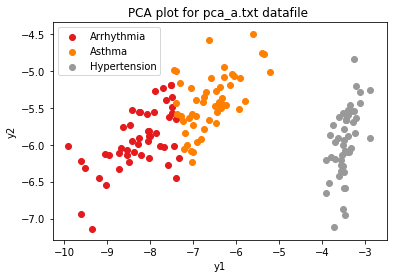

In [13]:
# Plotting the final dataframe with disease names
plot1 = maplot.figure()
plot11 = plot1.add_subplot(111)

# Generating variable number of colors
var_col = mapcm.Set1(numpy.linspace (0,1,len(unq_disease)))

for i in range(len(unq_disease)):
    plot11.scatter(final_dataf[final_dataf['disease']==unq_disease[i]]['y1'], final_dataf[final_dataf['disease']==unq_disease[i]]['y2'], color=var_col[i], label=unq_disease[i])

plot11.legend(loc='best')

plot11.set_xlabel('y1')

plot11.set_title(f"PCA plot for {file_name} datafile ")

plot11.set_ylabel('y2')

maplot.savefig('PCA plot for'+file_name+'.pdf')



## Dimensionality Reduction using SVD:

In [14]:
# Dimensionality Reduction using SVD (Singular Value Decomposition)
svd_new, s, v = numpy.linalg.svd(given_factors, full_matrices=False)

# Doing dot product of singular diagonal matrix with the first matrix(svd_new).
svd_new_temp = numpy.dot(svd_new, numpy.diag(s))

# Taking first 2 columsn of svd_new_temp as the new factors generated after dimensionality reduction 
svd_new_fac = svd_new_temp[:,[0,1]]

# Printing the new dimentions generated using SVD Algorithm
print(f"The new factors calculated using SVD algorithm are shown below:\n{svd_new_fac}\n")




The new factors calculated using SVD algorithm are shown below:
[[-8.88467232e+00  1.18251061e+00]
 [-9.74995091e+00  1.22201635e+00]
 [-6.65660680e+00 -1.97891371e+00]
 [-1.07956449e+01  1.36092608e+00]
 [-5.94268400e+00 -1.97524422e+00]
 [-9.97707769e+00  9.28306226e-01]
 [-6.63885388e+00 -2.14029263e+00]
 [-1.07354361e+01  1.08677497e+00]
 [-8.77444534e+00  7.72755132e-01]
 [-9.23842845e+00  9.21206853e-01]
 [-9.15356733e+00  1.00102336e+00]
 [-9.28336431e+00  4.20220653e-01]
 [-8.40422611e+00  1.37881991e-01]
 [-6.59298027e+00 -2.29710586e+00]
 [-1.04602047e+01  1.11406068e+00]
 [-6.73590886e+00 -1.97282076e+00]
 [-8.60439773e+00  5.07406535e-01]
 [-8.90410434e+00  4.30644551e-01]
 [-9.15759863e+00  6.80877231e-01]
 [-6.56538569e+00 -2.11267432e+00]
 [-9.85101368e+00  1.00996649e+00]
 [-6.35134112e+00 -1.81624227e+00]
 [-6.62418000e+00 -1.77382261e+00]
 [-8.79620604e+00  5.54612329e-01]
 [-9.60027422e+00  2.65596143e-01]
 [-8.71585177e+00  1.88787665e-01]
 [-8.50280886e+00  5.39590

In [15]:
# Setting the pandas to display maximum rows in the dataframe
pandas.set_option('display.max_rows', 5000)

# Adding the new dimentions (new_factors) and the disease names into a data frame
svd_temp_y1 = svd_new_fac[:,0]
svd_temp_y2 = svd_new_fac[:,1]
svd_final_dataf = pandas.DataFrame(dict(y1=list(svd_temp_y1),y2=list(svd_temp_y2), disease=disease_names))

# Printing the final PCA data frame
print(f"The final dataframe with two new dimentions and disease names found by SVD Algorithm is shown below: ")
svd_final_dataf

The final dataframe with two new dimentions and disease names found by SVD Algorithm is shown below: 


,y1,y2,disease
0,-8.884672,1.182511,Asthma
1,-9.749951,1.222016,Arrhythmia
2,-6.656607,-1.978914,Hypertension
3,-10.795645,1.360926,Arrhythmia
4,-5.942684,-1.975244,Hypertension
5,-9.977078,0.928306,Arrhythmia
6,-6.638854,-2.140293,Hypertension
7,-10.735436,1.086775,Arrhythmia
8,-8.774445,0.772755,Asthma
9,-9.238428,0.921207,Arrhythmia


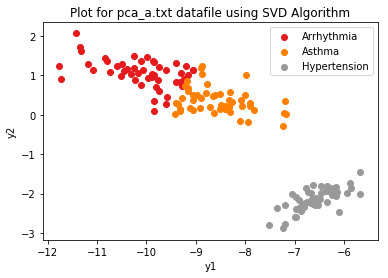

In [16]:
# Plotting the final dataframe with disease names
svd_plot1 = maplot.figure()
svd_plot11 = svd_plot1.add_subplot(111)

# Generating variable number of colors for the scatter plot
var_col = mapcm.Set1(numpy.linspace (0,1,len(unq_disease)))

#plotting the scatter plot
for i in range(len(unq_disease)):
    svd_plot11.scatter(svd_final_dataf[svd_final_dataf['disease']==unq_disease[i]]['y1'], svd_final_dataf[svd_final_dataf['disease']==unq_disease[i]]['y2'], color=var_col[i], label=unq_disease[i])

#giving the location of the legend showing disease name as "best"
#This would place the legend at the location in the graph that would overcover minimum data points
svd_plot11.legend(loc='best')

# Giving X axis label
svd_plot11.set_xlabel('y1')

# Giving the title for the graph
svd_plot11.set_title(f"Plot for {file_name} datafile using SVD Algorithm")

# Giving Y axis label
svd_plot11.set_ylabel('y2')

# Saving the scatter plot as a PDF file
maplot.savefig('Plot for'+file_name+' using SVD Algorithm .pdf')

## Dimensionality Reduction using t-SNE Algorithm:

In [24]:
# Dimensionality Reduction using TSNE Algorithm

# Note that t-SNE is a non deterministic algorithm. So if you run it multiple times you will get different results each time.

tsne_new_fac = TSNE(n_components = 2).fit_transform(given_factors)

# Printing the new factors calculated using t-SNE algorithm
print(f"The new factors calculated using t-SNE:\n{tsne_new_fac}\n")

The new factors calculated using t-SNE:
[[ -5.406454  -17.25219  ]
 [ -6.87413   -19.32325  ]
 [  6.0687017  18.25415  ]
 [ -6.3982835 -23.374796 ]
 [  7.94444    20.837542 ]
 [ -6.0298014 -20.640924 ]
 [  6.641334   18.112352 ]
 [ -6.4461126 -22.955421 ]
 [ -7.325808  -12.911868 ]
 [ -4.585689  -16.402155 ]
 [ -5.2095165 -16.850386 ]
 [ -6.8929152 -14.992916 ]
 [ -4.979194  -11.278496 ]
 [  7.3644905  17.681484 ]
 [ -6.8071866 -21.856867 ]
 [  5.632337   17.842398 ]
 [ -5.4746904 -11.955022 ]
 [ -5.4523306 -13.496059 ]
 [ -4.8976793 -15.705647 ]
 [  6.7322516  18.449865 ]
 [ -6.7131257 -19.574497 ]
 [  6.39858    20.053568 ]
 [  5.5242357  19.112495 ]
 [ -7.231569  -12.89638  ]
 [ -7.501571  -15.420261 ]
 [ -4.9688396 -12.400664 ]
 [ -5.8636317 -11.600626 ]
 [ -6.7146072 -24.120272 ]
 [  7.732728   21.154253 ]
 [  6.717138   20.565296 ]
 [ -5.5460706 -12.143232 ]
 [ -7.229228  -20.913958 ]
 [  6.6061907  17.37429  ]
 [  6.5525446  21.684046 ]
 [ -5.0736537 -15.985821 ]
 [  7.244618   

In [25]:
# Setting the pandas to display maximum rows in the dataframe
pandas.set_option('display.max_rows', 2000)

# Adding the new dimentions (new_factors) and the disease names into a data frame
tsne_temp_y1 = tsne_new_fac[:,0]
tsne_temp_y2 = tsne_new_fac[:,1]
tsne_final_dataf = pandas.DataFrame(dict(y1=list(tsne_temp_y1),y2=list(tsne_temp_y2), disease=disease_names))

# Printing the final PCA data frame
print(f"The final dataframe with two new dimentions and disease names found by t-SNE Algorithm is shown below: ")
tsne_final_dataf

The final dataframe with two new dimentions and disease names found by t-SNE Algorithm is shown below: 


,y1,y2,disease
0,-5.406454,-17.252190,Asthma
1,-6.874130,-19.323250,Arrhythmia
2,6.068702,18.254150,Hypertension
3,-6.398283,-23.374796,Arrhythmia
4,7.944440,20.837542,Hypertension
5,-6.029801,-20.640924,Arrhythmia
6,6.641334,18.112352,Hypertension
7,-6.446113,-22.955421,Arrhythmia
8,-7.325808,-12.911868,Asthma
9,-4.585689,-16.402155,Arrhythmia


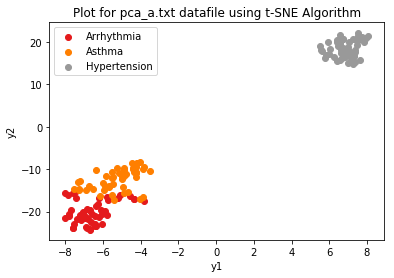

In [26]:
# Plotting the final dataframe with disease names
tsne_plot1 = maplot.figure()
tsne_plot11 = tsne_plot1.add_subplot(111)

# Generating variable number of colors for the scatter plot
var_col = mapcm.Set1(numpy.linspace (0,1,len(unq_disease)))

#plotting the scatter plot
for i in range(len(unq_disease)):
    tsne_plot11.scatter(tsne_final_dataf[tsne_final_dataf['disease']==unq_disease[i]]['y1'], tsne_final_dataf[tsne_final_dataf['disease']==unq_disease[i]]['y2'], color=var_col[i] , label=unq_disease[i])
    
#giving the location of the legend showing disease name as "best"
#This would place the legend at the location in the graph that would overcover minimum data points.
tsne_plot11.legend(loc='best')

# Giving X axis label
tsne_plot11.set_xlabel('y1')

# Giving the title for the graph
tsne_plot11.set_title(f"Plot for {file_name} datafile using t-SNE Algorithm")

# Giving Y axis label
tsne_plot11.set_ylabel('y2')

# Saving the scatter plot as a PDF file
maplot.savefig('Plot for'+file_name+' using t-SNE Algorithm .pdf')

In [20]:
# Part 1: Dimensionality Reduction using PCA, SVD and t-SNE comepletes here.